In [1]:
from main import *
import time 
import pickle

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
# save/load results

# with open('adaptation_results.p', 'wb') as f:
#     pickle.dump(populations, f)

# with open('adaptation_results.p', 'rb') as f:
#     pop = pickle.load(f)

In [2]:
%%prun -D adaptation_test.prof -q

generations = 5
population_size = 10

# run simulation
populations = run_simulation(generations=generations, population_size=population_size, mutations_per_division=2)

Generation  0 took 233.66962385177612 seconds
Generation  1 took 28.288390159606934 seconds
Generation  2 took 21.193515062332153 seconds
Generation  3 took 4.828150033950806 seconds
Generation  4 took 0.00032520294189453125 seconds
 
*** Profile stats marshalled to file 'adaptation_test.prof'. 


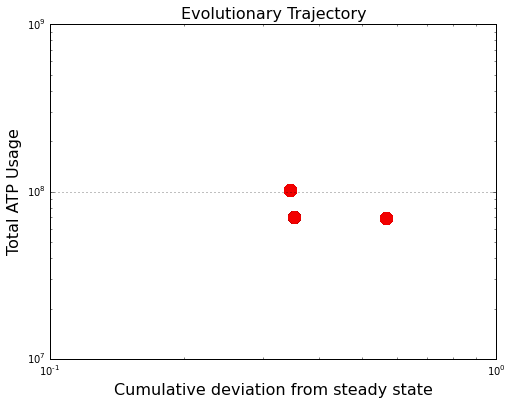

In [18]:
# plot 2D evolutionary trajectory
ax = plot_2D_trajectory(populations, obj=(0, 1))
# ax.set_xlim(1e0, 1e5)
# ax.set_ylim(1e6, 1e9)
ax.set_ylabel('Total ATP Usage')
ax.set_xlabel('Cumulative deviation from steady state')

Reaction Type           Reactants    Enzymes    Products
----------------------  -----------  ---------  ----------
modification            [1]          []         [3]
modification            [1]          []         [4]
catalytic_degradation   [0]          [1]        []
modification            [1]          []         [5]
catalytic_modification  [2]          [1]        [6]


Regulation Type      Target Gene    Transcription Factor
-----------------  -------------  ----------------------
activation                     0                       1
activation                     1                       0


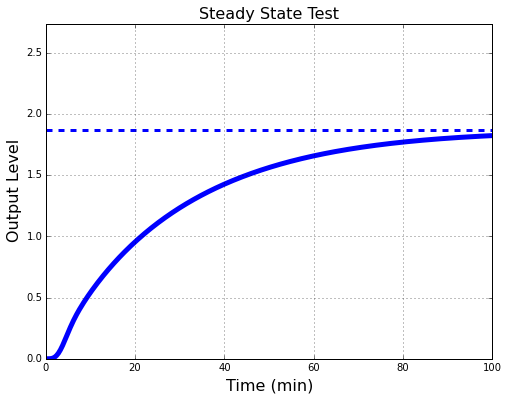

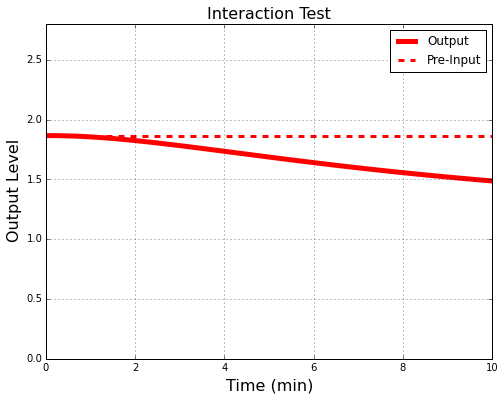

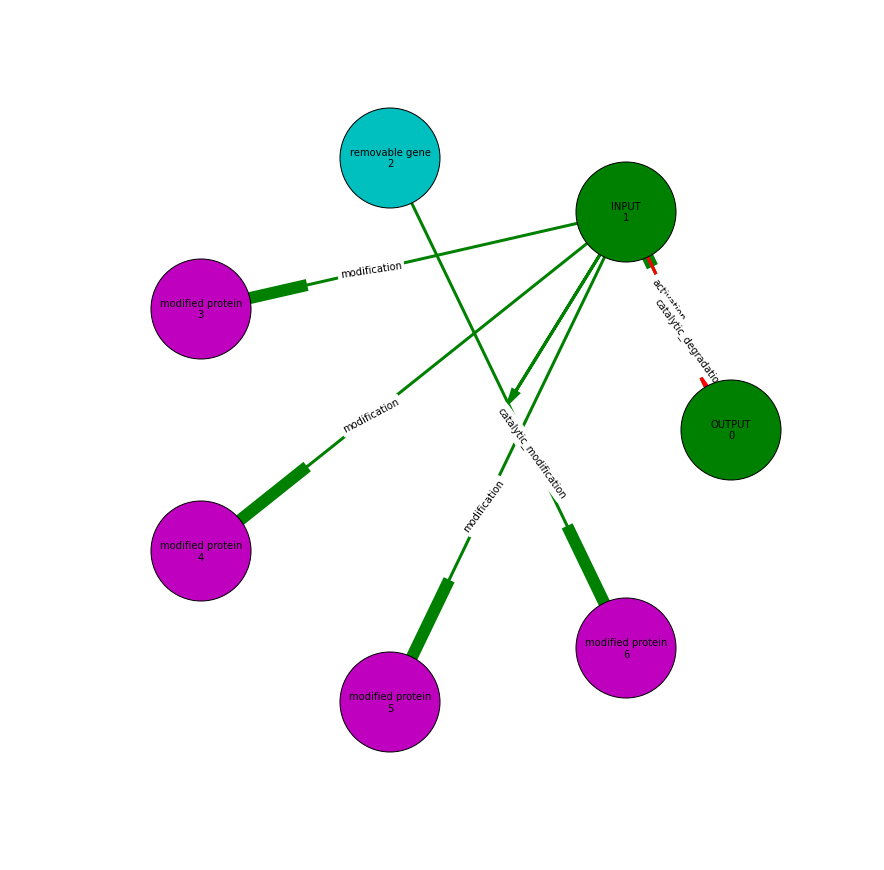

In [21]:
# select a cell from the population
cell_num = 8
cell = list(populations[len(populations)-1].items())[cell_num][0]

# check it's steady state simulation results
steady_states = cell.get_steady_states(input_node=2, input_magnitude=1)
cell.plot_steady_states(input_node=2, input_magnitude=1, output_node=1)
ax = plt.gca()
ax.plot([0, 100], [steady_states[cell.key[1]], steady_states[cell.key[1]]], '--b', linewidth=3, label='Steady State')

# check its interaction test results
_ = cell.interaction_check_numerical(input_node=2, output_node=1, steady_states=steady_states, plot=True)
ax = plt.gca()
ax.plot([0, 100], [steady_states[cell.key[1]], steady_states[cell.key[1]]], '--r', linewidth=3, label='Pre-Input')
ax.legend(loc=0)

# generate table of all reactions and modifications
cell.show_reactions(grn_indices=True)

# generate network graph
cell.show_topology(input_node=2, output_node=1)

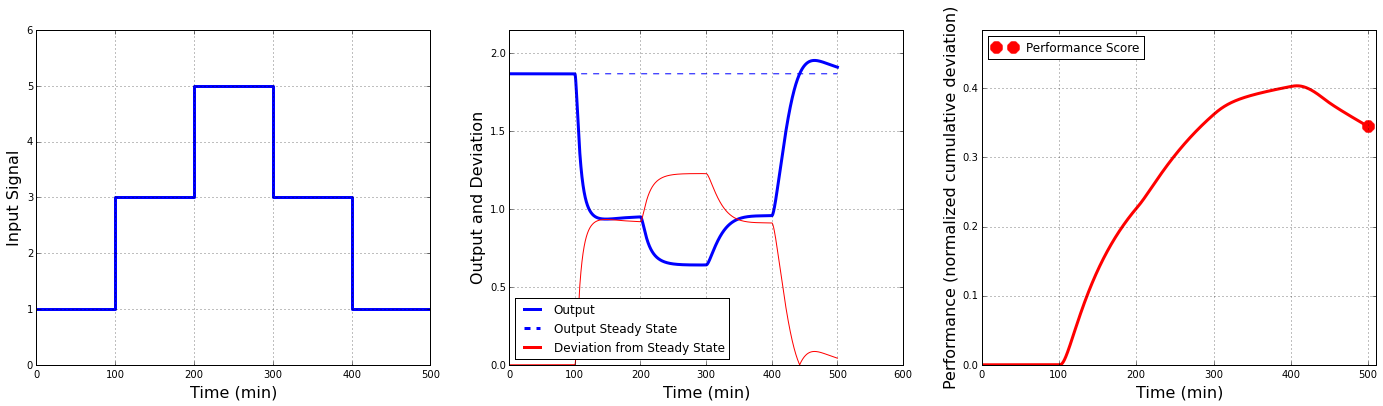

In [22]:
# run fitness test

# cell = Cell(1, permanent_genes=2)
# for _ in range(0, 300):
#     _, cell = cell.divide(2)

score, energy = adaptation_test(cell, input_node=2, output_node=1, input_random=False, plot=True)